# Agentの自己学習

In [9]:
import matplotlib.pyplot as plt
from random import random, randint, seed
# from statistics import mean
from copy import deepcopy
import robot
import collections
import math

In [10]:
#----------ゲームの設定----------
# オブジェクト
class MyObject():
    def __init__(self, x, y):
        self.x1 = x#座標
        self.y1 = y
# gameエリア
class Area(MyObject):
    def __init__(self, x, y, width, height):# エリア設定
        super(Area, self).__init__(x, y)
        self.x2 = x + width
        self.y2 = y + height
        
    def draw(self):# 描画
        plt.figure(figsize=(5, 5))
        width = 0.9
        x = [self.x1 - width, 
             self.x1 - width, 
             self.x2 + width, 
             self.x2 + width, 
             self.x1 - width]
        
        y = [self.y1 - width, 
             self.y2 + width, 
             self.y2 + width, 
             self.y1 - width, 
             self.y1 - width]

        plt.plot(x, y, color='#1f77b4')
        margin_width = 5
        plt.ylim(self.x1 - margin_width, 
                 self.x2 + margin_width)
        plt.xlim(self.y1 - margin_width, 
                 self.y2 + margin_width)
# 障害物
class Obstacle(MyObject):
    def __init__(self, x, y, width, height):# エリア設定
        super(Obstacle, self).__init__(x, y)
        self.x2 = x + width
        self.y2 = y + height
    
    def draw(self):# 描画
        width = 0.9
        x = [self.x1 - width, 
             self.x1 - width, 
             self.x2 + width, 
             self.x2 + width, 
             self.x1 - width]
        
        y = [self.y1 - width, 
             self.y2 + width, 
             self.y2 + width, 
             self.y1 - width, 
             self.y1 - width]

        plt.plot(x, y, color='#FF0000')
# エージェント
class Agent(MyObject):
    def __init__(self, x, y):# 初期設定
        super(Agent, self).__init__(x, y)
    
    def getAgent(self):# 座標を取得
        return (self.x1, self.y1)
    
    def area_collision(self, area):# エリアの衝突判定
        # エリアの範囲に出たら，エリア内の戻す
        if self.x1 <= area.x1:
            self.x1 = area.x1
        if self.y1 <= area.y1:
            self.y1 = area.y1
        if self.x1 >= area.x2:
            self.x1 = area.x2
        if self.y1 >= area.y2:
            self.y1 = area.y2
    # 障害物との衝突判定
    def obstacle_collision(self, obstacle, x, y):
        if self.x1 >= obstacle.x1 \
            and self.x1 <= obstacle.x2 \
            and self.y1 >= obstacle.y1 \
            and self.y1 <= obstacle.y2:# 障害物に侵入した時
            self.x1 = x
            self.y1 = y
    # 障害物との衝突判定
    def goal_collision(self, obstacle):
        if self.x1 >= obstacle.x1 \
            and self.x1 <= obstacle.x2 \
            and self.y1 >= obstacle.y1 \
            and self.y1 <= obstacle.y2:# 障害物に侵入した時
            return True
        return False
        
    def draw(self):# 描画
        plt.plot(self.x1, 
                 self.y1,
                 marker='.', 
                 markersize = 20, 
                 color='#1f77b4')
    
    def up(self):# 上へ移動
        self.y1 += 1
    def down(self):# 下へ移動
        self.y1 -= 1
    def right(self):# 右へ移動
        self.x1 += 1
    def left(self):# 左へ移動
        self.x1 -= 1

class Goal(MyObject):
    def __init__(self, x, y, width, height):# エリア設定
        super(Goal, self).__init__(x, y)
        self.x2 = x + width
        self.y2 = y + height
    
    def draw(self):# 描画
        width = 0.9
        x = [self.x1 - width, 
             self.x1 - width, 
             self.x2 + width, 
             self.x2 + width, 
             self.x1 - width]
        
        y = [self.y1 - width, 
             self.y2 + width, 
             self.y2 + width, 
             self.y1 - width, 
             self.y1 - width]

        plt.plot(x, y, color='#008000')
# mainの関数
def run(goal_xy, move, fig_draw_mode):
    fig_interval = 1 #画像表示間隔
    # fig_draw_mode 
    
    area = Area(0, 0, 30, 30)# Area 生成
    agent = Agent(2, 2)# agent 生成
    goal = Goal(goal_xy[0], goal_xy[1], 2, 2)
    
    # 障害物リスト　
    bstacle_list = [Obstacle(15, 5, 2, 15), # 障害物１
                    Obstacle(5, 15, 5, 3),  # 障害物2
                    Obstacle(20, 27, 5, 3), # 障害物3
                    Obstacle(24, 20, 5, 3),  # 障害物4
                    ]
    
    object_list = [area, agent, goal] + bstacle_list# オブジェクトリスト
    #　描画
    if fig_draw_mode == 1:
        for oject in object_list:
                oject.draw()
    # メインの計算
    for t in range(len(move)):
        x_before = agent.x1#移動前のx座標
        y_before = agent.y1#移動前のy座標
        # --移動--
        if move[t] == 'UP':
            agent.up()
        if move[t] == 'DOWN':
            agent.down()
        if move[t] == 'RIGHT':
            agent.right()
        if move[t] == 'LEFT':
            agent.left()
        # --衝突判定--
        agent.area_collision(area)# エリア
        for bstacle in bstacle_list:# 障害物
            agent.obstacle_collision(bstacle, x_before, y_before)
        # --ゴール判定--
        if agent.goal_collision(goal): return agent.getAgent()# ゴール(計算の終了)
        #　--描画--
        if fig_draw_mode == 1:
            if t % fig_interval == 0:
                for oject in object_list:
                    oject.draw()
    # 計算の終了
    return agent.getAgent()

#if __name__ == "__main__":
#    move_list = []
#    for i in range(3):
#         move_list.append('RIGHT')
#         
#    print(run([28, 28], move_list, 1))

________________________
gen: 0 , best_of_run_f: 0.035 , best_of_run:
move
   move
      move
         move
            move
               UP
               move
                  move
                     RIGHT
                     RIGHT
                  move
                     move
                        UP
                        RIGHT
                     move
                        UP
                        UP
            move
               DOWN
               RIGHT
         move
            move
               LEFT
               DOWN
            move
               RIGHT
               DOWN
      move
         move
            move
               DOWN
               RIGHT
            move
               LEFT
               DOWN
         move
            move
               LEFT
               RIGHT
            move
               UP
               RIGHT
   move
      move
         move
            move
               RIGHT
               DOWN
            move
           

________________________
gen: 5 , best_of_run_f: 0.098 , best_of_run:
move
   move
      move
         LEFT
         RIGHT
      move
         RIGHT
         UP
   move
      move
         move
            move
               RIGHT
               DOWN
            move
               move
                  move
                     RIGHT
                     move
                        move
                           move
                              RIGHT
                              RIGHT
                           move
                              move
                                 UP
                                 RIGHT
                              move
                                 UP
                                 move
                                    move
                                       move
                                          move
                                             DOWN
                                             RIGHT
                  

________________________
gen: 6 , best_of_run_f: 1.0 , best_of_run:
move
   move
      move
         move
            LEFT
            DOWN
         move
            RIGHT
            DOWN
      move
         LEFT
         UP
   move
      move
         move
            move
               UP
               DOWN
            move
               move
                  move
                     RIGHT
                     move
                        move
                           move
                              RIGHT
                              RIGHT
                           move
                              move
                                 UP
                                 RIGHT
                              move
                                 UP
                                 UP
                        move
                           RIGHT
                           RIGHT
                  move
                     UP
                     move
                       

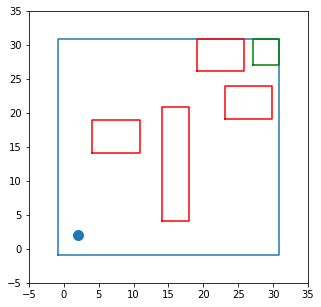

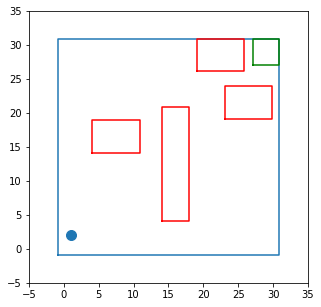

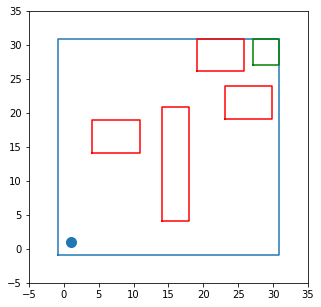

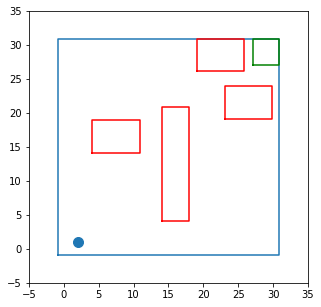

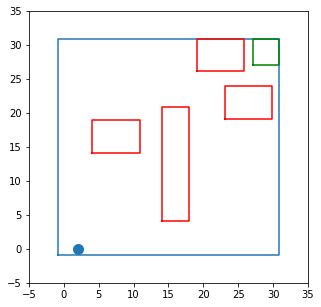

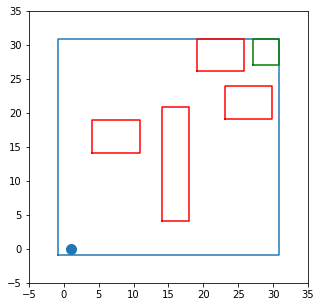

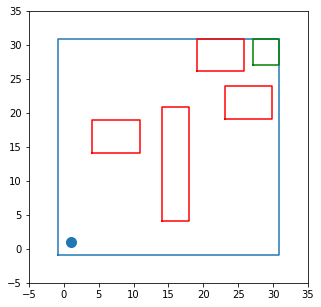

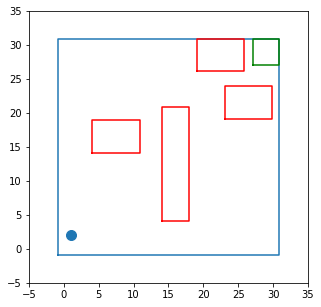

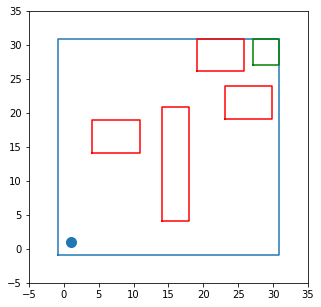

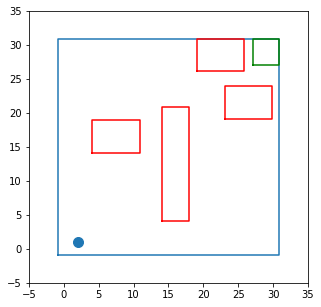

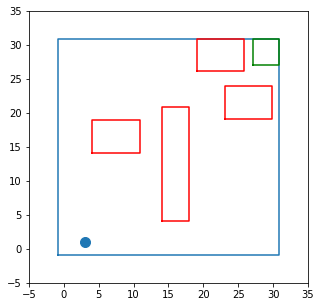

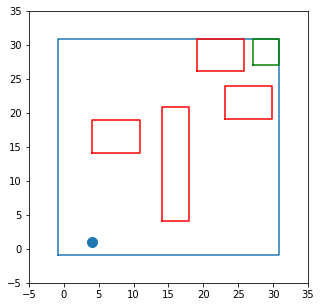

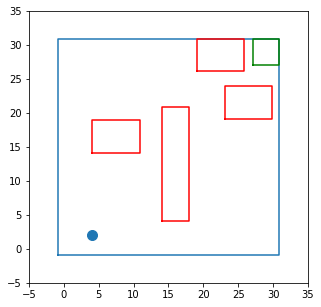

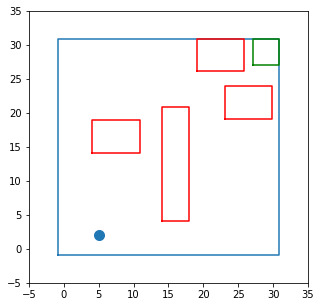

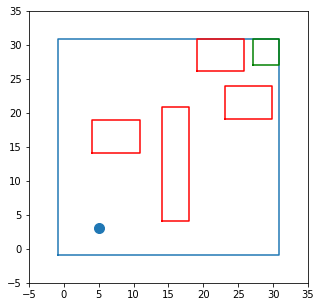

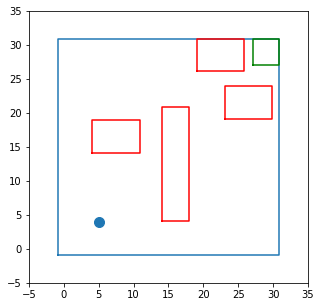

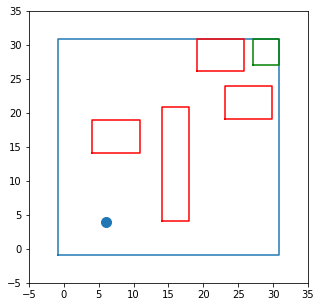

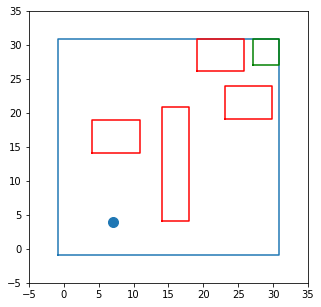

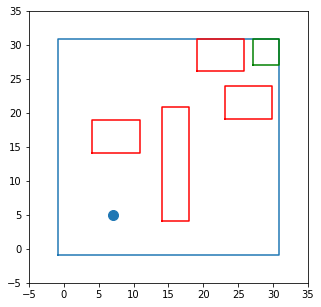

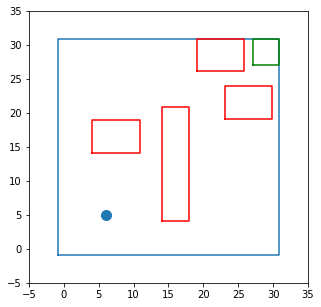

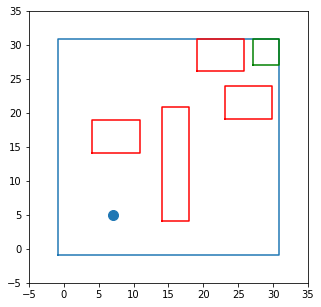

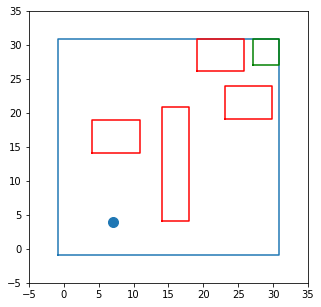

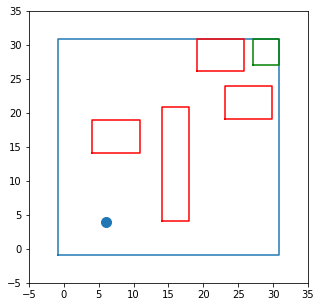

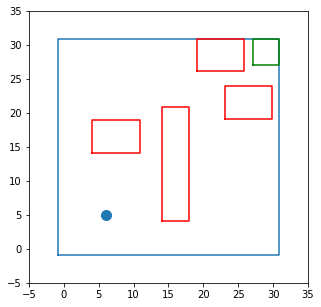

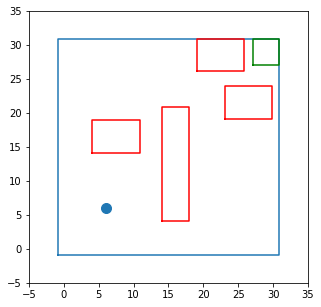

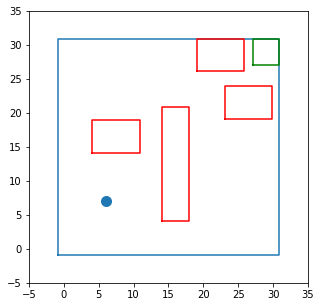

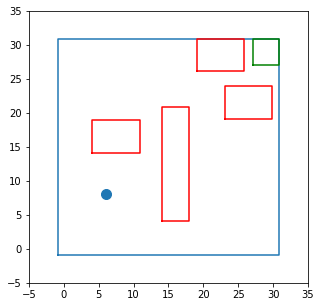

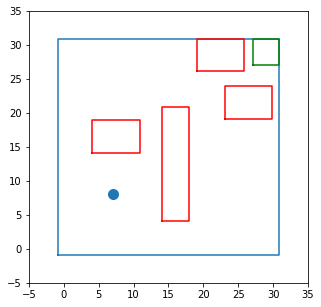

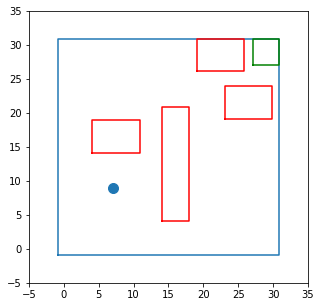

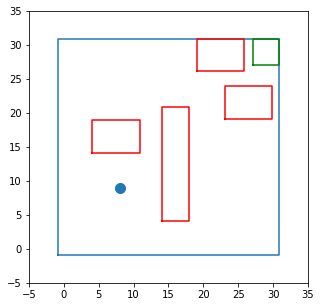

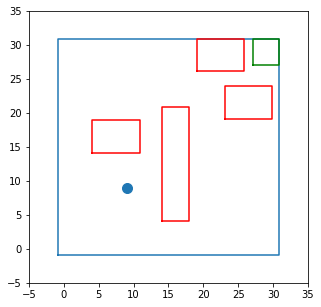

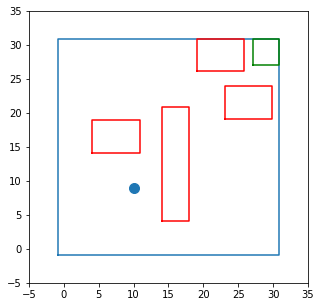

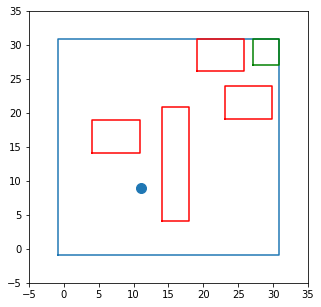

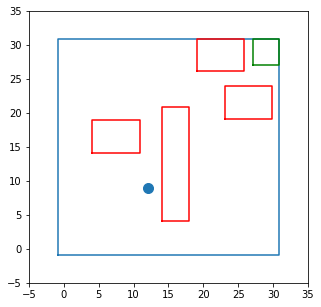

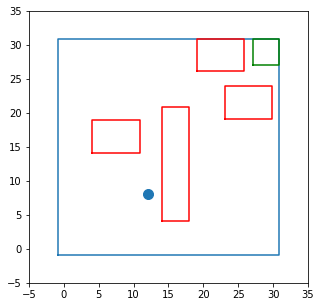

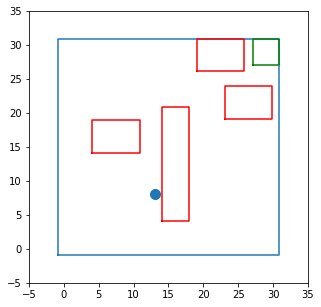

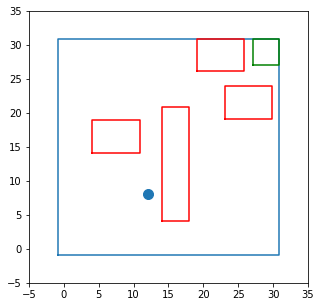

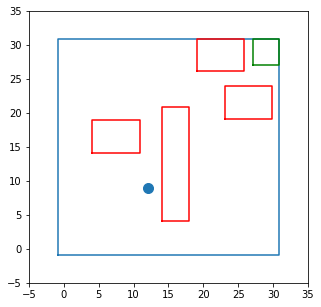

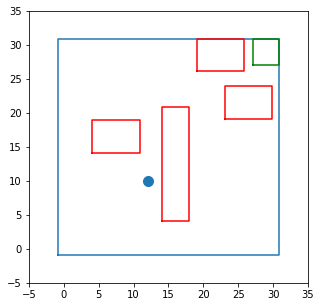

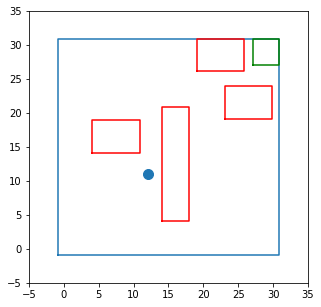

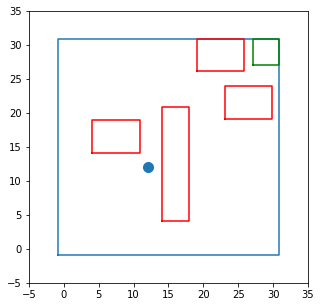

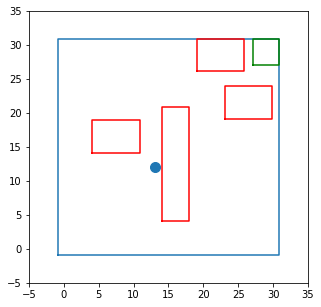

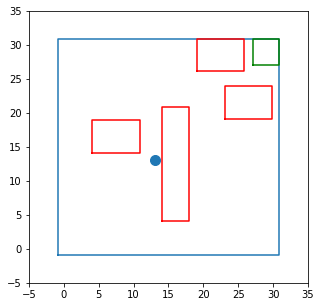

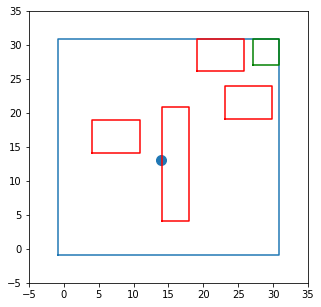

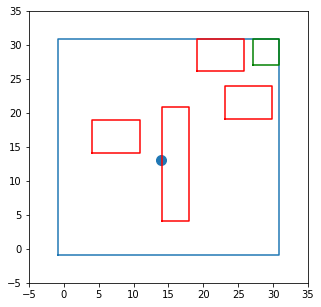

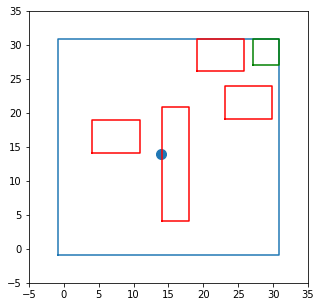

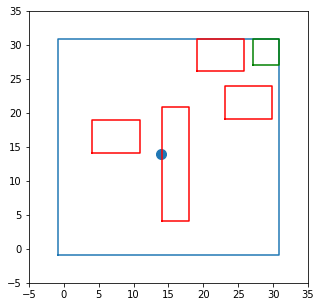

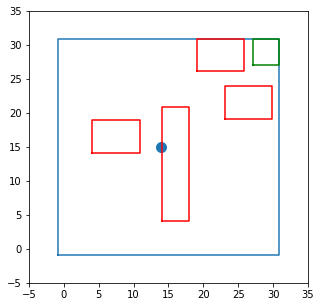

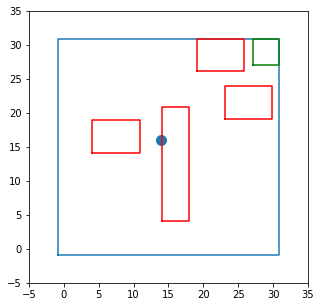

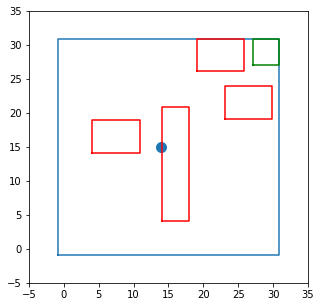

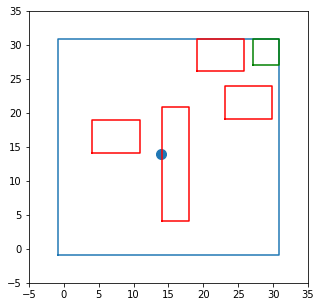

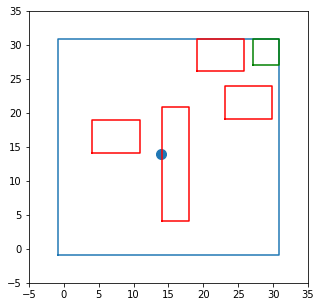

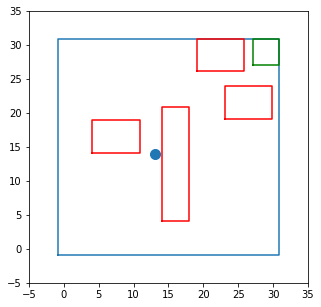

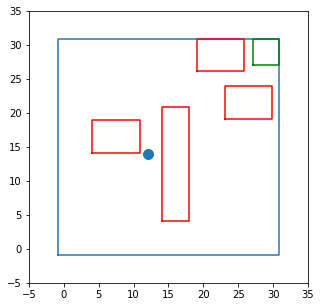

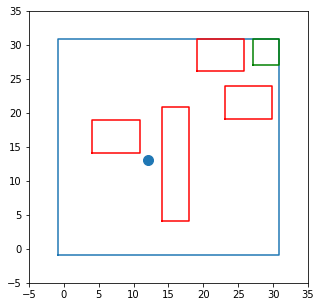

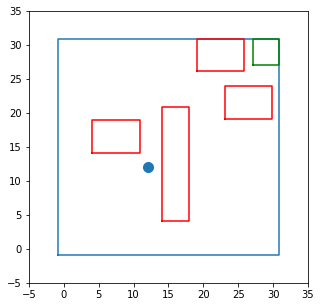

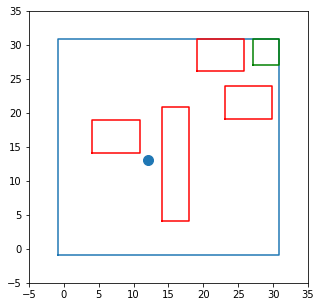

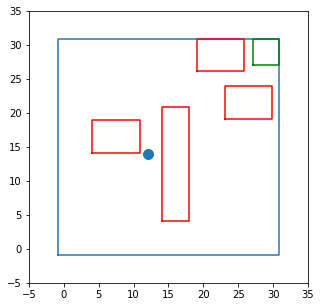

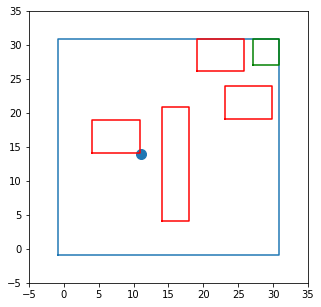

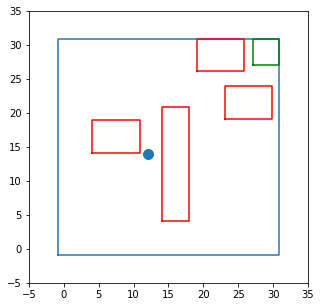

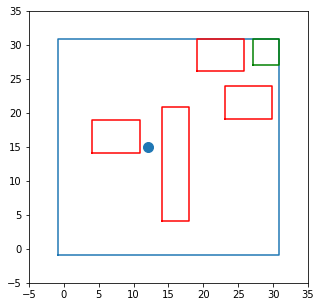

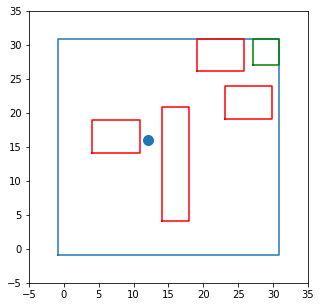

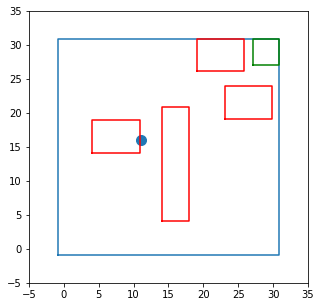

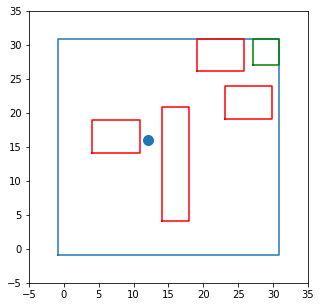

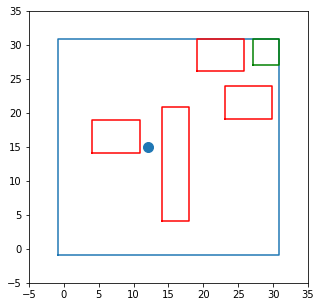

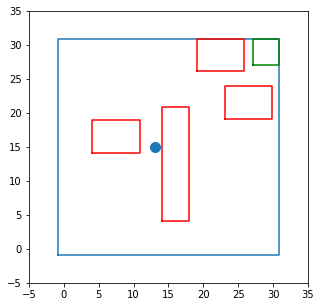

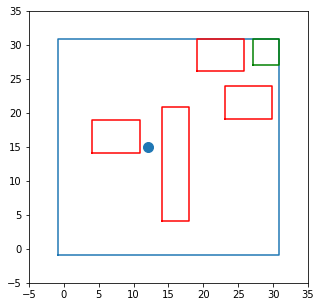

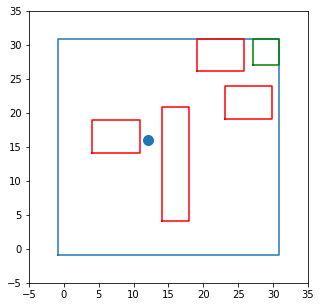

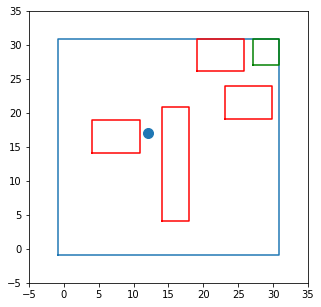

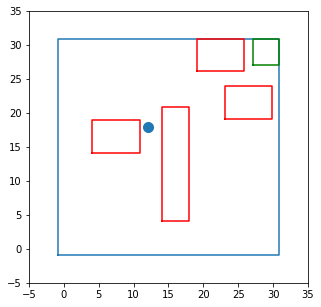

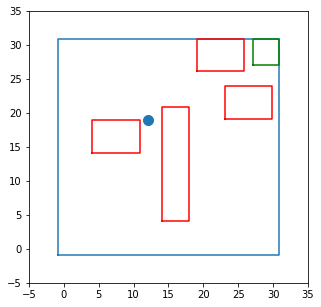

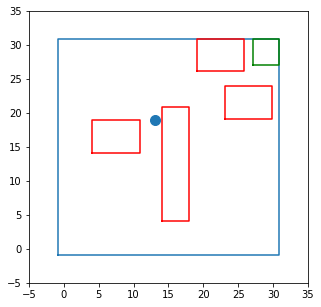

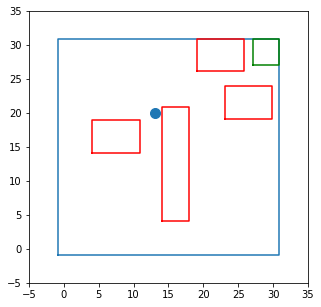

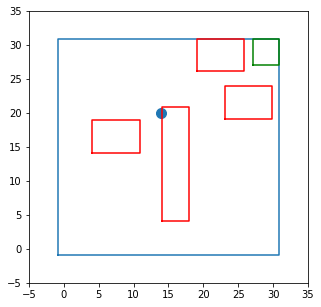

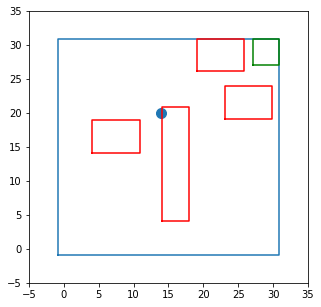

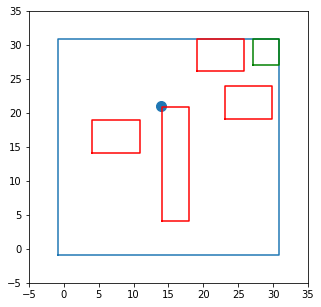

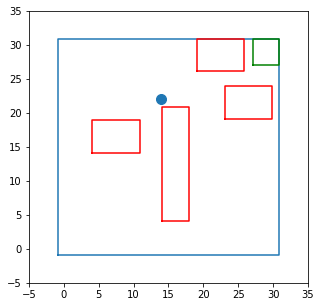

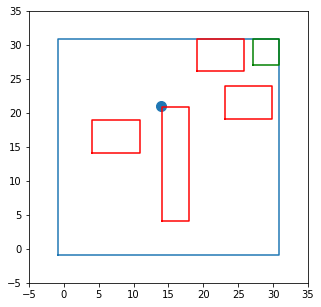

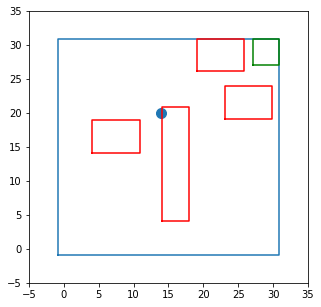

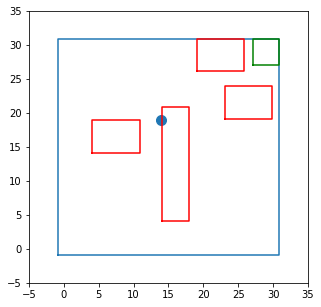

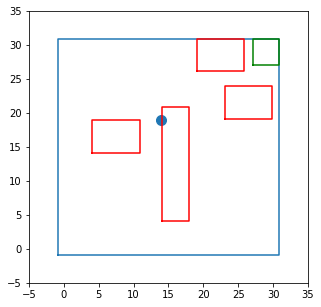

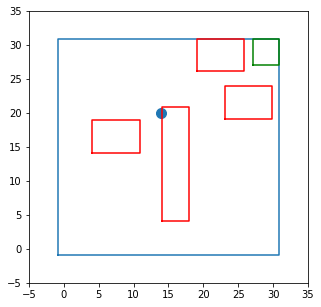

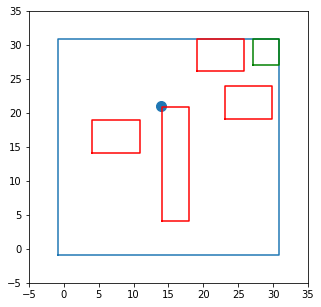

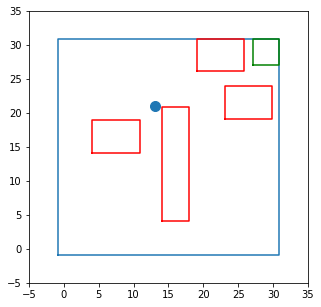

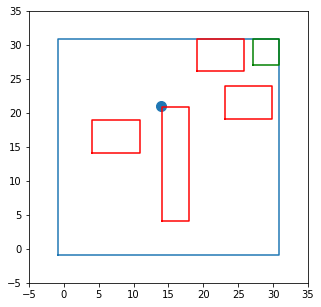

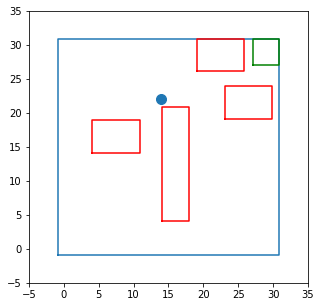

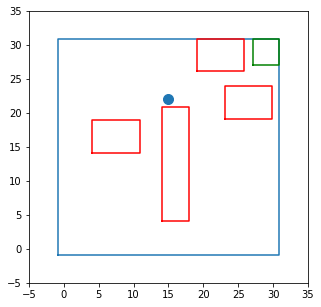

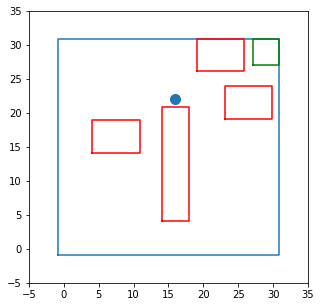

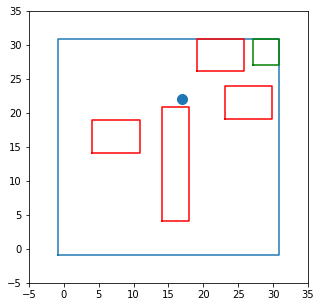

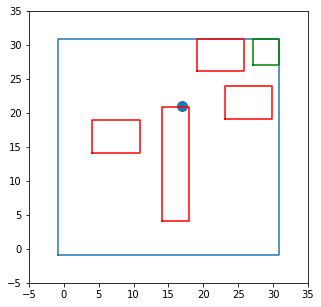

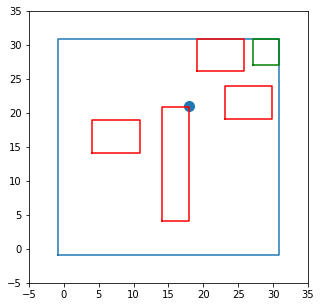

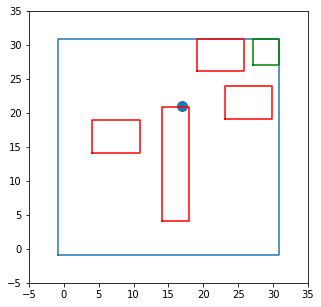

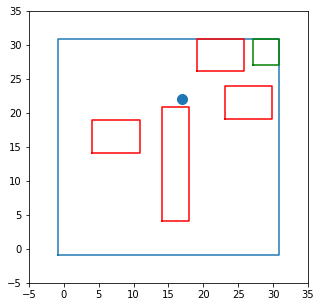

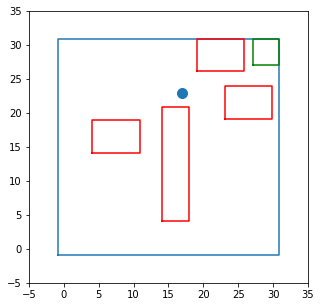

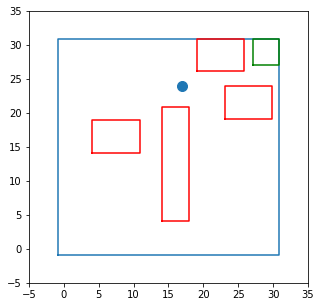

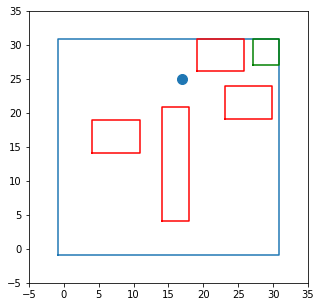

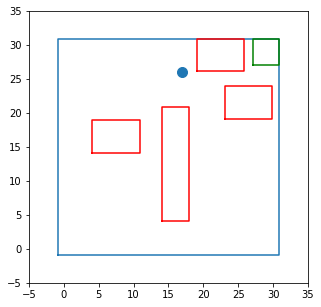

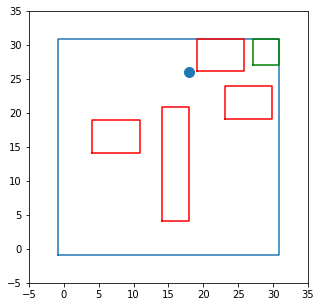

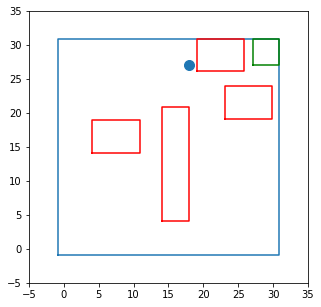

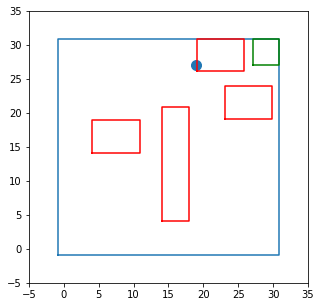

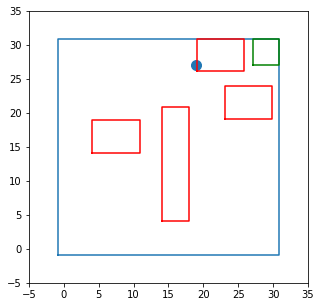

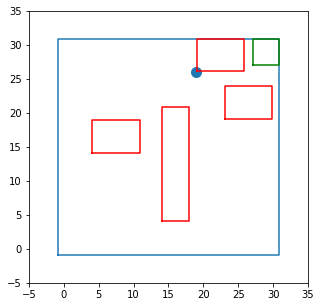

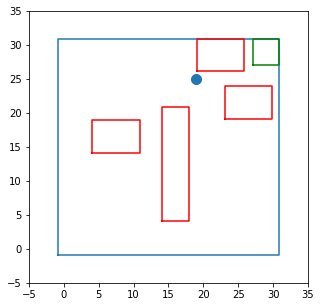

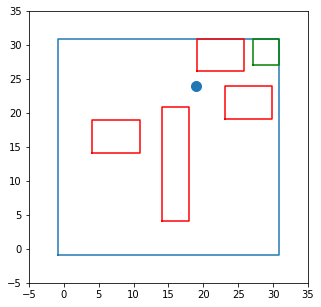

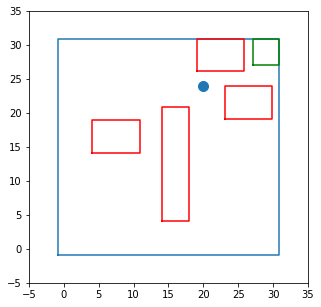

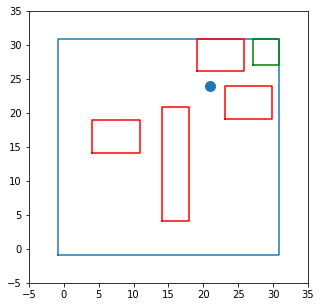

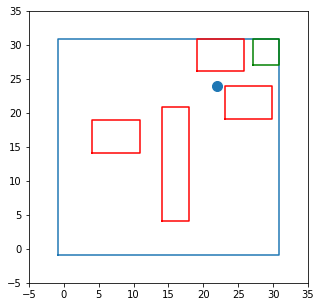

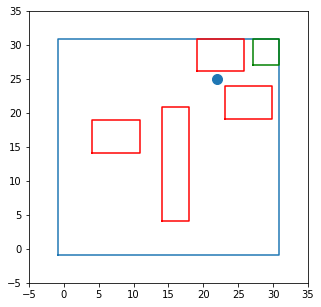

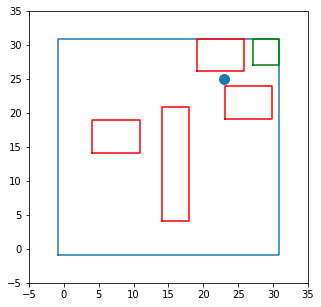

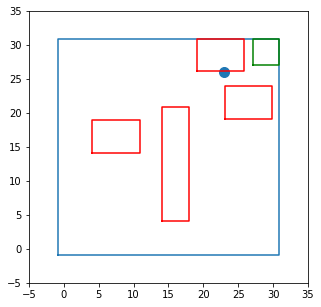

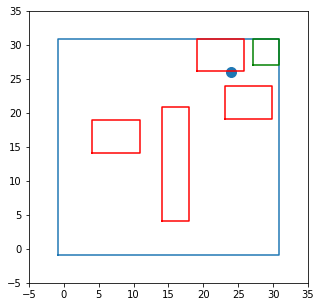

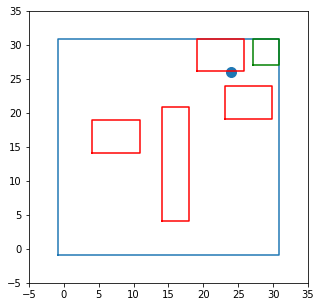

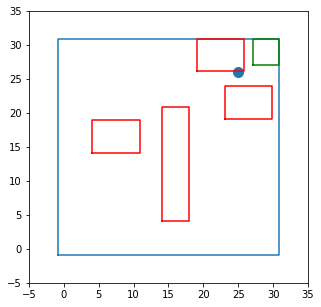

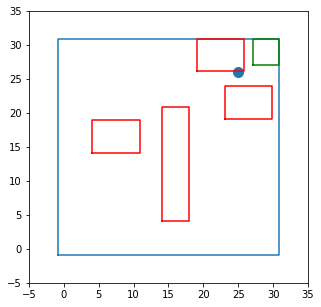

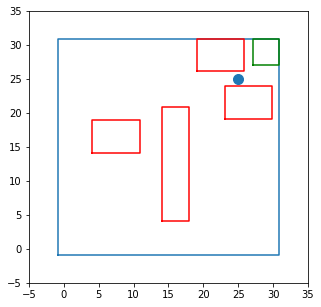

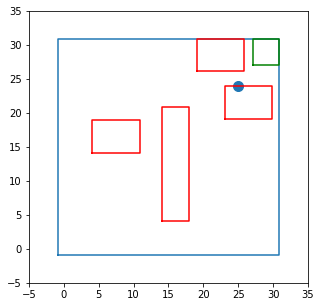

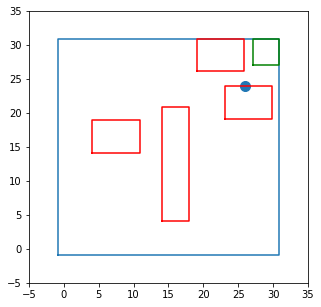

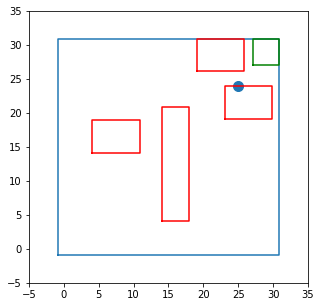

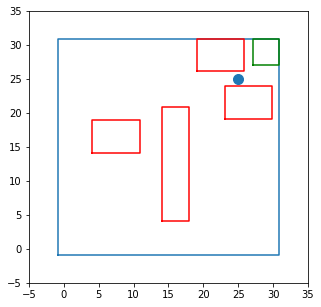

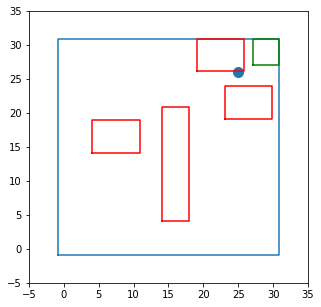

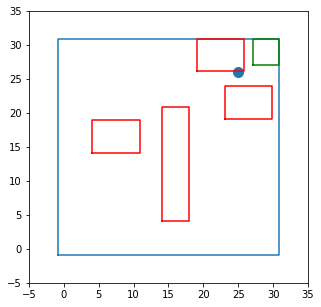

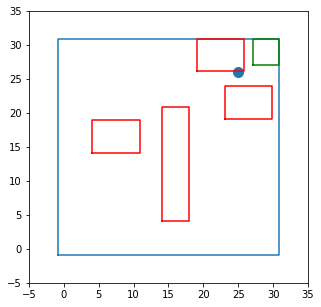

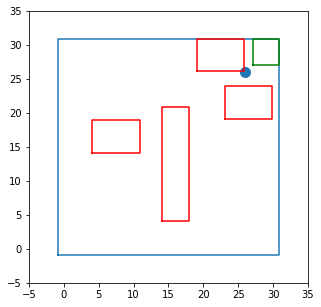

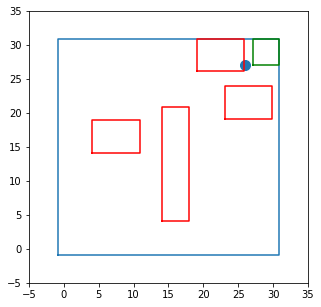

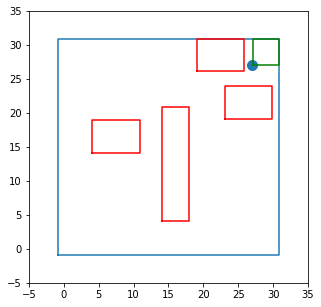

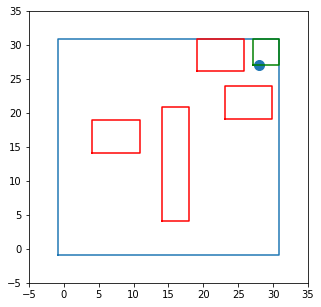

In [11]:
# ---------- GP ----------
POP_SIZE        = 60   # population size
MIN_DEPTH       = 2    # minimal initial random tree depth
MAX_DEPTH       = 5    # maximal initial random tree depth
GENERATIONS     = 30  # maximal number of generations to run evolution
TOURNAMENT_SIZE = 5    # size of tournament for tournament selection
XO_RATE         = 0.8  # crossover rate 
PROB_MUTATION   = 0.2  # per-node mutation probability 

def move(x, y): return [x, y]

FUNCTIONS = [move]
TERMINALS = ['UP', 'DOWN','RIGHT','LEFT']

class GPTree:
    def __init__(self, data = None, left = None, right = None):
        self.data  = data
        self.left  = left
        self.right = right
        
    def node_label(self): # string label
        if (self.data in FUNCTIONS):
            return self.data.__name__
        else: 
            return str(self.data)
    
    def print_tree(self, prefix = ""): # textual printout
        print("%s%s" % (prefix, self.node_label()))        
        if self.left:  self.left.print_tree (prefix + "   ")
        if self.right: self.right.print_tree(prefix + "   ")

    def compute_tree(self):# 木の情報を返すだけ
        if (self.data in FUNCTIONS): 
            return self.data(self.left.compute_tree(), self.right.compute_tree())
        else:
            return self.data
            
    def random_tree(self, grow, max_depth, depth = 0): # create random tree using either grow or full method
        if depth < MIN_DEPTH or (depth < max_depth and not grow): 
            self.data = FUNCTIONS[randint(0, len(FUNCTIONS)-1)]
        elif depth >= max_depth:   
            self.data = TERMINALS[randint(0, len(TERMINALS)-1)]
        else: # intermediate depth, grow
            if random () > 0.5: 
                self.data = TERMINALS[randint(0, len(TERMINALS)-1)]
            else:
                self.data = FUNCTIONS[randint(0, len(FUNCTIONS)-1)]
        if self.data in FUNCTIONS:
            self.left = GPTree()          
            self.left.random_tree(grow, max_depth, depth = depth + 1)            
            self.right = GPTree()
            self.right.random_tree(grow, max_depth, depth = depth + 1)

    def mutation(self):
        if random() < PROB_MUTATION: # mutate at this node
            self.random_tree(grow = True, max_depth = 2)
        elif self.left: self.left.mutation()
        elif self.right: self.right.mutation() 

    def size(self): # tree size in nodes
        if self.data in TERMINALS: return 1
        l = self.left.size()  if self.left  else 0
        r = self.right.size() if self.right else 0
        return 1 + l + r

    def build_subtree(self): # count is list in order to pass "by reference"
        t = GPTree()
        t.data = self.data
        if self.left:  t.left  = self.left.build_subtree()
        if self.right: t.right = self.right.build_subtree()
        return t
                        
    def scan_tree(self, count, second): # note: count is list, so it's passed "by reference"
        count[0] -= 1            
        if count[0] <= 1: 
            if not second: # return subtree rooted here
                return self.build_subtree()
            else: # glue subtree here
                self.data  = second.data
                self.left  = second.left
                self.right = second.right
        else:  
            ret = None              
            if self.left  and count[0] > 1: ret = self.left.scan_tree(count, second)  
            if self.right and count[0] > 1: ret = self.right.scan_tree(count, second)  
            return ret

    def crossover(self, other): # xo 2 trees at random nodes
        if random() < XO_RATE:
            second = other.scan_tree([randint(1, other.size())], None) # 2nd random subtree
            self.scan_tree([randint(1, self.size())], second) # 2nd subtree "glued" inside 1st tree
# end class GPTree
def init_population(): # ramped half-and-half
    pop = []
    for md in range(3, MAX_DEPTH + 1):
        for i in range(int(POP_SIZE/6)):
            t = GPTree()
            t.random_tree(grow = True, max_depth = md) # grow
            pop.append(t) 
        for i in range(int(POP_SIZE/6)):
            t = GPTree()
            t.random_tree(grow = False, max_depth = md) # full
            pop.append(t) 
    return pop
# 適応度の計算
def fitness(individual): # inverse mean absolute error over dataset normalized to [0,1]
    l = list(flatten(individual.compute_tree()))
    global goal_xy
    xy = robot.run(goal_xy, l, 0)
    # 適応度 = 1/(ゴールとAgentの距離(最終の位置) + 1)
    return 1/(math.sqrt((xy[0] - goal_xy[0])**2 + (xy[1] - goal_xy[1])**2) + 1)
# トーナメント選択
def selection(population, fitnesses): # select one individual using tournament selection
    tournament = [randint(0, len(population)-1) for i in range(TOURNAMENT_SIZE)] # select tournament contenders
    tournament_fitnesses = [fitnesses[tournament[i]] for i in range(TOURNAMENT_SIZE)]
    return deepcopy(population[tournament[tournament_fitnesses.index(max(tournament_fitnesses))]]) 
# リストの入れ子状態をフラットにする
def flatten(l):
    for el in l:
        if isinstance(el, collections.abc.Iterable) and not isinstance(el, (str, bytes)):
            yield from flatten(el)
        else:
            yield el

def main():      
    # init stuff
    seed() # init internal state of random number generator
    # dataset = generate_dataset()
    population= init_population() 
    best_of_run = None
    best_of_run_f = 0
    best_of_run_gen = 0
    fitnesses = [fitness(population[i]) for i in range(POP_SIZE)]
    
    # population[0](最適化前のもの，1例を保存しておく，比較のために)
    init_run = deepcopy(population[0])
    
    # go evolution!
    for gen in range(GENERATIONS):        
        nextgen_population=[]
        for i in range(POP_SIZE):
            parent1 = selection(population, fitnesses)
            parent2 = selection(population, fitnesses)
            parent1.crossover(parent2)
            parent1.mutation()
            nextgen_population.append(parent1)
        population=nextgen_population
        fitnesses = [fitness(population[i]) for i in range(POP_SIZE)]
        if max(fitnesses) > best_of_run_f:
            best_of_run_f = max(fitnesses)
            best_of_run_gen = gen
            best_of_run = deepcopy(population[fitnesses.index(max(fitnesses))])
            print("________________________")
            print("gen:", gen, ", best_of_run_f:", round(max(fitnesses),3), ", best_of_run:") 
            best_of_run.print_tree()
        if best_of_run_f == 1: break   
    
    print("\n\n_________________________________________________\nEND OF RUN\nbest_of_run attained at gen " + str(best_of_run_gen) +\
          " and has f=" + str(round(best_of_run_f,3)))
    #best_of_run.print_tree()
    print(best_of_run.compute_tree())
    best_tree = best_of_run.compute_tree()
    best_list = list(flatten(best_tree))
    
    init_list = list(flatten(init_run.compute_tree()))
    #print(best_of_run.list)
    print()
    print(best_list)
    global goal_xy
    # robot.run(goal_xy, init_list, 1)# 最適化前の結果を再現
    robot.run(goal_xy, best_list, 1)# 最良の結果を再現    



goal_xy = [28, 28]# ゴール位置
main()